<a href="https://colab.research.google.com/github/gsiregarm/Bioinformatics/blob/main/MetagenomicFMT_ColonCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks'
df = pd.read_csv('level-6.csv')

print(df.describe())  # Get summary statistics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks
       k__Bacteria;p__Proteobacteria;__;__;__;__  \
count                                 172.000000   
mean                                  153.616279   
std                                  1267.764535   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     5.000000   
max                                 15734.000000   

       k__Bacteria;p__Firmicutes;__;__;__;__  \
count                             172.000000   
mean                             1459.174419   
std                              7449.644534   
min                                 0.000000   
25%                                 0.000000   
50%                                 8.000000   
75%                       

In [ ]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks'
df = pd.read_csv('level-7.csv')

print(df.describe())  # Get summary statistics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks
       k__Bacteria;p__Proteobacteria;__;__;__;__;__  \
count                                    172.000000   
mean                                     153.616279   
std                                     1267.764535   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        5.000000   
max                                    15734.000000   

       k__Bacteria;p__Firmicutes;__;__;__;__;__  \
count                                172.000000   
mean                                1459.174419   
std                                 7449.644534   
min                                    0.000000   
25%                                    0.000000   
50%                          

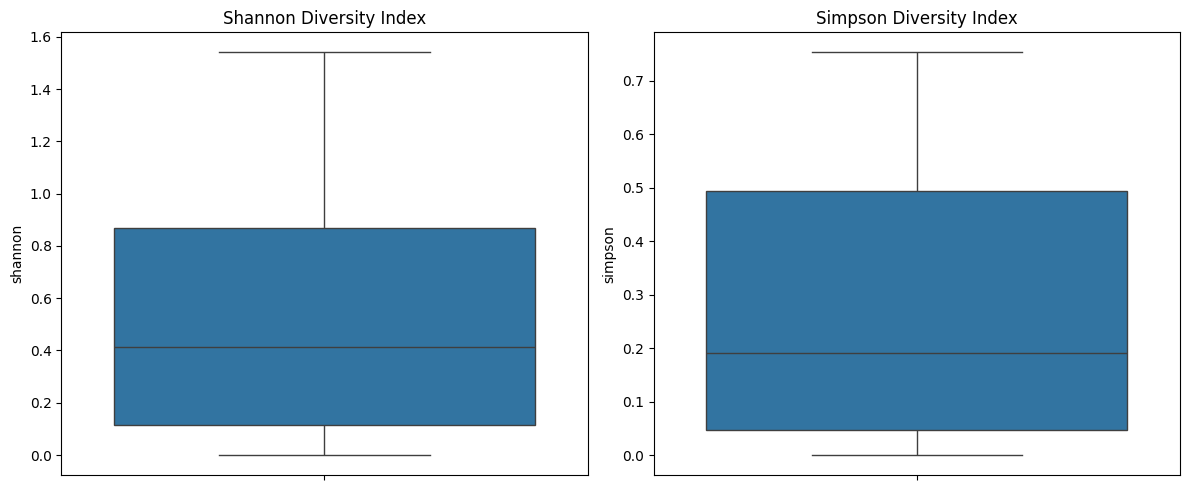

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("level-6.csv")  # File being used

# Select only taxonomic abundance columns (excluding metadata)
taxonomy_columns = df.columns[1:11]  # Adjust index range based on taxonomy columns
taxa_df = df[taxonomy_columns]

# Normalize to relative abundance (sum to 1 per sample)
taxa_df = taxa_df.div(taxa_df.sum(axis=1), axis=0)

### **Alpha Diversity Calculation**
# Shannon Diversity Index
df["shannon"] = taxa_df.apply(lambda x: entropy(x + 1e-10), axis=1)  # Add small value to avoid log(0)

# Simpson Diversity Index (1 - D, where D = sum of squared proportions)
df["simpson"] = taxa_df.apply(lambda x: 1 - np.sum(np.square(x)), axis=1)

# Plot Alpha Diversity
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, y="shannon", ax=axes[0])
axes[0].set_title("Shannon Diversity Index")

sns.boxplot(data=df, y="simpson", ax=axes[1])
axes[1].set_title("Simpson Diversity Index")

plt.tight_layout()
plt.show()


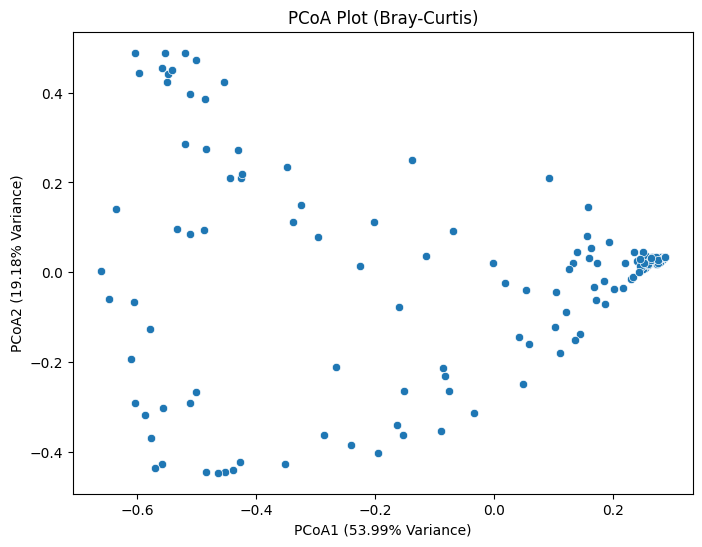

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh

# Load dataset
df = pd.read_csv("level-6.csv")  # File Being used

# Select only taxonomic abundance columns (excluding metadata)
taxonomy_columns = df.columns[1:11]  # Adjust based on taxonomy columns
taxa_df = df[taxonomy_columns]

# Normalize to relative abundance (sum to 1 per sample)
taxa_df = taxa_df.div(taxa_df.sum(axis=1), axis=0)

### **1️⃣ Compute Bray-Curtis Dissimilarity Matrix**
bray_curtis_dist = squareform(pdist(taxa_df, metric="braycurtis"))

### **2️⃣ Perform PCoA Using Eigen Decomposition**
# Double centering transformation (Gower’s centered matrix)
n = bray_curtis_dist.shape[0]
I = np.eye(n)
ones = np.ones((n, n))
H = I - (1 / n) * ones
B = -0.5 * H @ (bray_curtis_dist ** 2) @ H

# Compute eigenvalues & eigenvectors
eigvals, eigvecs = eigh(B)

# Sort eigenvalues in descending order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Select first 2 principal coordinates
PCoA1 = eigvecs[:, 0] * np.sqrt(eigvals[0])
PCoA2 = eigvecs[:, 1] * np.sqrt(eigvals[1])

# Convert to DataFrame
pcoa_df = pd.DataFrame({"PCoA1": PCoA1, "PCoA2": PCoA2, "Sample": df.index})

### **3️⃣ Plot PCoA Results**
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pcoa_df, x="PCoA1", y="PCoA2")
plt.xlabel(f"PCoA1 ({eigvals[0] / eigvals.sum() * 100:.2f}% Variance)")
plt.ylabel(f"PCoA2 ({eigvals[1] / eigvals.sum() * 100:.2f}% Variance)")
plt.title("PCoA Plot (Bray-Curtis)")
plt.show()


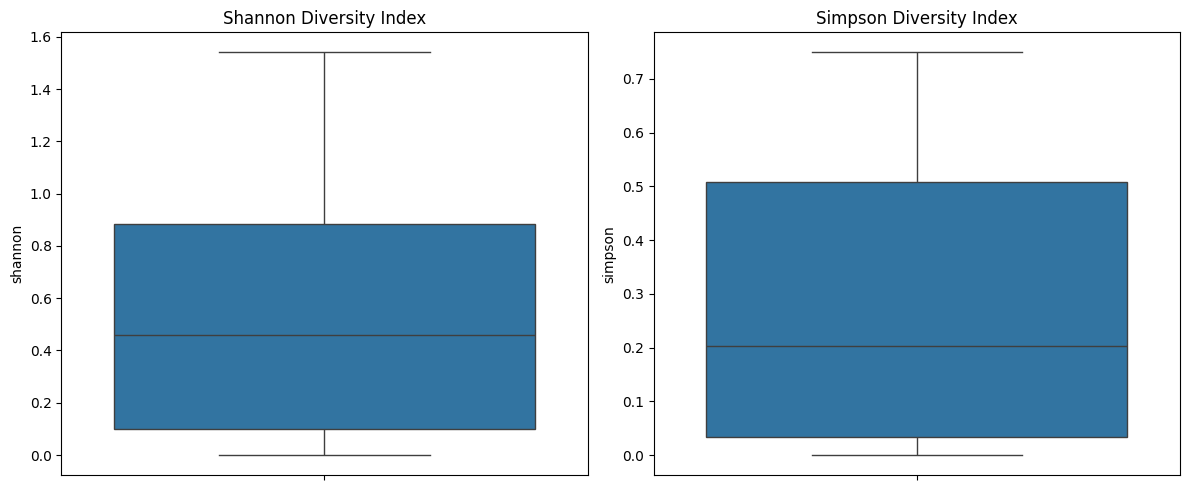

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("level-7.csv")  # File Being used

# Select only taxonomic abundance columns (excluding metadata)
taxonomy_columns = df.columns[1:11]  # Adjust index range based on taxonomy columns
taxa_df = df[taxonomy_columns]

# Normalize to relative abundance (sum to 1 per sample)
taxa_df = taxa_df.div(taxa_df.sum(axis=1), axis=0)

### **Alpha Diversity Calculation**
# Shannon Diversity Index
df["shannon"] = taxa_df.apply(lambda x: entropy(x + 1e-10), axis=1)  # Add small value to avoid log(0)

# Simpson Diversity Index (1 - D, where D = sum of squared proportions)
df["simpson"] = taxa_df.apply(lambda x: 1 - np.sum(np.square(x)), axis=1)

# Plot Alpha Diversity
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, y="shannon", ax=axes[0])
axes[0].set_title("Shannon Diversity Index")

sns.boxplot(data=df, y="simpson", ax=axes[1])
axes[1].set_title("Simpson Diversity Index")

plt.tight_layout()
plt.show()


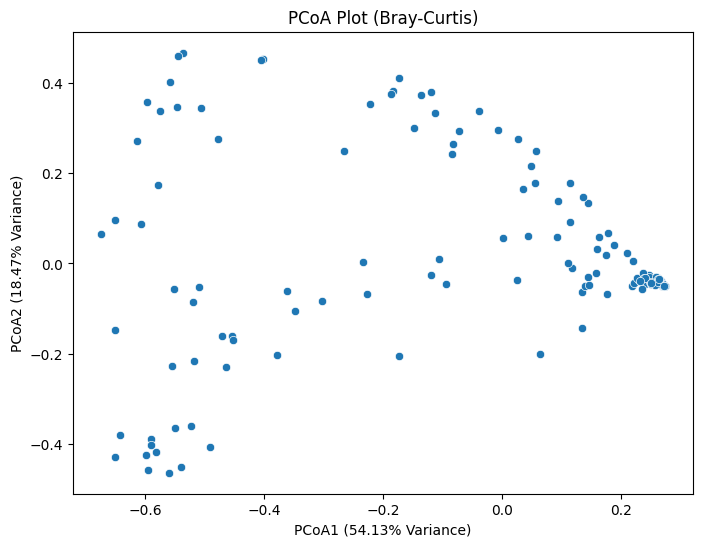

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh

# Load dataset
df = pd.read_csv("level-7.csv")  # File being used

# Select only taxonomic abundance columns (excluding metadata)
taxonomy_columns = df.columns[1:11]  # Adjust based on taxonomy columns
taxa_df = df[taxonomy_columns]

# Normalize to relative abundance (sum to 1 per sample)
taxa_df = taxa_df.div(taxa_df.sum(axis=1), axis=0)

### **1️⃣ Compute Bray-Curtis Dissimilarity Matrix**
bray_curtis_dist = squareform(pdist(taxa_df, metric="braycurtis"))

### **2️⃣ Perform PCoA Using Eigen Decomposition**
# Double centering transformation (Gower’s centered matrix)
n = bray_curtis_dist.shape[0]
I = np.eye(n)
ones = np.ones((n, n))
H = I - (1 / n) * ones
B = -0.5 * H @ (bray_curtis_dist ** 2) @ H

# Compute eigenvalues & eigenvectors
eigvals, eigvecs = eigh(B)

# Sort eigenvalues in descending order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Select first 2 principal coordinates
PCoA1 = eigvecs[:, 0] * np.sqrt(eigvals[0])
PCoA2 = eigvecs[:, 1] * np.sqrt(eigvals[1])

# Convert to DataFrame
pcoa_df = pd.DataFrame({"PCoA1": PCoA1, "PCoA2": PCoA2, "Sample": df.index})

### **3️⃣ Plot PCoA Results**
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pcoa_df, x="PCoA1", y="PCoA2")
plt.xlabel(f"PCoA1 ({eigvals[0] / eigvals.sum() * 100:.2f}% Variance)")
plt.ylabel(f"PCoA2 ({eigvals[1] / eigvals.sum() * 100:.2f}% Variance)")
plt.title("PCoA Plot (Bray-Curtis)")
plt.show()